# Test walking experience

This Notebooks contains calculation testing to determine walking experience in different areas of a city. Here, a specific area within Guadalajara is evaluated.

## Import libraries

In [52]:
import os
import sys

import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Study area

<AxesSubplot:>

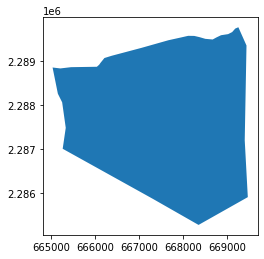

In [2]:
area_gdf = gpd.read_file('../../data/processed/walking_experience/test_area.geojson')
area_gdf.plot()

## Gather data

In [3]:
gdf_tmp = area_gdf.copy()
gdf_tmp = gdf_tmp.to_crs("EPSG:6372")
gdf_tmp = gdf_tmp.buffer(1).reset_index().rename(columns={0:'geometry'})
gdf_tmp = gdf_tmp.set_geometry("geometry")
gdf_tmp = gdf_tmp.to_crs("EPSG:4326")
poly_wkt = gdf_tmp.dissolve().geometry.to_wkt()[0]

### Street network

In [4]:
_, nodes, edges = aup.graph_from_hippo(area_gdf, schema='osmnx',
                    edges_folder='edges_speed', nodes_folder='nodes')

In [14]:
edges = edges.reset_index()
print(edges.shape)
edges.head(2)

(7540, 22)


,u,v,key,osmid,oneway,lanes,name,highway,length,geometry,...,access,tunnel,ref,maxspeed,bridge,junction,service,width,walkspeed,time_min
0,1607124854,1180215233,0,825868122,True,3,Calle Rubén Darío,residential,76.662,"LINESTRING (-103.38292 20.69680, -103.38283 20...",...,None,None,None,None,None,None,None,None,3.652071,1.259483
1,1370726825,6393761118,0,829845577,True,2,Avenida Montevideo,tertiary,79.158,"LINESTRING (-103.38972 20.69600, -103.38954 20...",...,None,None,None,None,None,None,None,None,3.822078,1.242643


In [15]:
nodes = nodes.reset_index()
print(nodes.shape)
nodes.head(2)

(3848, 5)


,osmid,x,y,street_count,geometry
0,28791285,-103.386953,20.674556,3,POINT (-103.38695 20.67456)
1,28791397,-103.387021,20.674199,3,POINT (-103.38702 20.67420)


<AxesSubplot:>

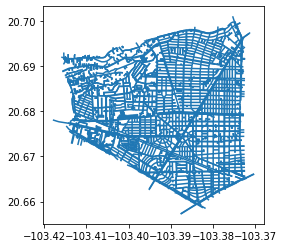

In [7]:
edges.plot()

### NDVI

In [8]:
query = f"SELECT * FROM raster_analysis.ndvi_analysis_hex WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\') AND res=11"
ndvi = aup.gdf_from_query(query, geometry_col='geometry')
print(ndvi.shape)
ndvi.head(4)

(5617, 11)


,hex_id,geometry,res,ndvi_mean,ndvi_std,ndvi_median,ndvi_max,ndvi_min,ndvi_diff,ndvi_tend,city
0,8b49ab59ad91fff,"POLYGON ((-103.41214 20.67623, -103.41197 20.6...",11,0.216753,0.051414,0.233964,0.261082,0.139668,0.121415,-0.001124,Guadalajara
1,8b49ab59ad86fff,"POLYGON ((-103.41266 20.67554, -103.41249 20.6...",11,0.229298,0.052827,0.241117,0.278091,0.146635,0.131456,-0.001165,Guadalajara
2,8b49ab59ad9afff,"POLYGON ((-103.41204 20.67721, -103.41187 20.6...",11,0.040741,0.014515,0.042140,0.055976,0.022702,0.033274,-0.000541,Guadalajara
3,8b49ab59adb5fff,"POLYGON ((-103.41276 20.67457, -103.41259 20.6...",11,0.315923,0.099601,0.322738,0.430078,0.191908,0.238170,-0.002446,Guadalajara


<AxesSubplot:>

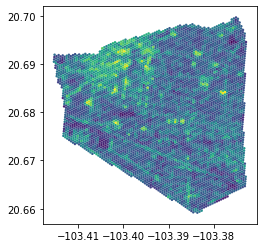

In [9]:
ndvi.plot('ndvi_mean')

### Estructura urbana - Frente de manzana - Marco Geoestadístico

In [10]:
query = f"SELECT * FROM censo_urbano.censo_fm_2020 WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
entorno = aup.gdf_from_query(query, geometry_col='geometry')
print(entorno.shape)
entorno.head(4)

(3973, 68)


,CVEGEO2,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CVEVIAL_x,CVESEG,CVEFT_x,NOMVIAL_x,...,ESTACIONBICI,ARBOLES,ALUMPUB,TELPUB,PUESTOSEMI,PUESTOAMBU,BANQUETA,GUARNICION,TAMLOC,VIANOESP
0,1403900015648002,14,039,0001,5648,002,05108,00004,2,San Bonifacio,...,3,1,1,3,3,3,1,1,11,0
1,1403900015648022,14,039,0001,5648,022,05108,00011,3,San Bonifacio,...,3,1,1,3,3,3,1,1,11,0
2,141200001116A073,14,120,0001,116A,073,17710,00001,3,Paseo del Acantilado,...,3,3,3,3,3,3,1,1,11,0
3,1403900011043003,14,039,0001,1043,003,00180,00001,2,Huicholes,...,1,1,1,3,3,3,1,1,11,0


### DENUE

In [11]:
query = f"SELECT * FROM denue.denue_2020 WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
denue = aup.gdf_from_query(query, geometry_col='geometry')
print(denue.shape)
denue.head(4)

(8492, 42)


,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipo_uni_eco,latitud,longitud,fecha_alta,geometry
0,8723545.0,PISICULTORES DE TLAJOMULCO S.C. DE R.L. DE C.V.,PISICULTORES DE TLAJOMULCO SC DE RL DE CV,114119.0,"Pesca y captura de peces, crustáceos, moluscos...",6 a 10 personas,AVENIDA,NIÑOS HÉROES,CALLE,5,...,1768,21.0,nan,CONSTELACION85@HOTMAIL.COM,None,Fijo,20.666262,-103.390495,2019-11,POINT (-103.39050 20.66626)
1,6491776.0,REPRODUCCION PORCINA DE OCCIDENTE,REPRODUCCION PORCINA DE OCCIDENTE SA DE CV,115210.0,Servicios relacionados con la cría y explotaci...,0 a 5 personas,AVENIDA,MEXICO,CALLE,JUANA DE ARCO,...,1289,25.0,nan,REPRODUCCIONPORCINA@YAHOO.COM.MX,None,Fijo,20.679410,-103.387790,2016-01,POINT (-103.38779 20.67941)
2,1664949.0,SISTEMA INTERMUNICIPAL DE AGUA POTABLE Y ALCAN...,SISTEMA INTERMUNICIPAL DE AGUA POTABLE Y ALCAN...,221312.0,"Captación, tratamiento y suministro de agua re...",11 a 30 personas,CALLE,JOSE MARIA VIGIL,CALLE,PALERMO,...,0613,26.0,nan,None,WWW.SIAPA.GOB.MX,Fijo,20.690374,-103.378830,2014-12,POINT (-103.37883 20.69037)
3,1857994.0,COMICION FEDERAL DE ELECTRICIDAD,COMISION FEDERAL DE ELECTRICIDAD,221111.0,Generación de electricidad a partir de combust...,11 a 30 personas,AVENIDA,VALLARTA,BOULEVARD,HOMERO,...,1556,36.0,nan,None,WWW.CFE.MX,Fijo,20.674227,-103.396910,2010-07,POINT (-103.39691 20.67423)


In [21]:
def number_of_jobs(per_ocu):
    jobs_dict = {'0 a 5 personas':3,
                '6 a 10 personas':8,
                '11 a 30 personas':20,
                '31 a 50 personas':40,
                '51 a 100 personas':75,
                '101 a 250 personas':175,
                '251 y más personas':325}
    per_ocu_num = jobs_dict[per_ocu]
    return per_ocu_num

In [22]:
denue['per_ocu_num'] = denue.per_ocu.apply(lambda per_ocu: number_of_jobs(per_ocu))

### Censo

In [12]:
query = f"SELECT * FROM censo_mza.censo_mza_2020 WHERE ST_Intersects(geometry, \'SRID=4326;{poly_wkt}\')"
censo = aup.gdf_from_query(query, geometry_col='geometry')
print(censo.shape)
censo.head(4)

(983, 239)


,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,AMBITO,TIPOMZA,geometry,ENTIDAD,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,1403900014461001,14,039,0001,4461,001,Urbana,Típica,"POLYGON ((-103.39014 20.69559, -103.39005 20.6...",14,...,13,20,19,15,11,3,None,None,None,0
1,1403900014457040,14,039,0001,4457,040,Urbana,Contenedora,"POLYGON ((-103.39192 20.69641, -103.39170 20.6...",14,...,0,0,0,0,0,0,0,0,0,0
2,1403900014457038,14,039,0001,4457,038,Urbana,Edificio-Manzana,"POLYGON ((-103.39380 20.69555, -103.39400 20.6...",14,...,8,10,9,8,6,4,0,0,None,0
3,1403900014457037,14,039,0001,4457,037,Urbana,Edificio-Manzana,"POLYGON ((-103.39366 20.69584, -103.39322 20.6...",14,...,8,19,19,5,16,3,3,0,0,0


## Method test

### Street test

In [23]:
edge_test = edges.loc[(edges.u==1607124854)&
         (edges.v==1377048859)&
         (edges.key==0)].copy()
edge_test

,u,v,key,osmid,oneway,lanes,name,highway,length,geometry,...,access,tunnel,ref,maxspeed,bridge,junction,service,width,walkspeed,time_min
5086,1607124854,1377048859,0,284557012,True,None,Calle Buenos Aires,residential,204.361,"LINESTRING (-103.38292 20.69680, -103.38166 20...",...,None,None,None,None,None,None,None,None,3.930609,3.119532


### Area of analysis test

In [38]:
hex_intersect_list = gpd.sjoin(edge_test, ndvi, op='intersects')
hex_intersect_list = list(hex_intersect_list.hex_id.unique())
hex_intersect_list

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


['8b498c96b951fff',
 '8b498c96b95cfff',
 '8b498c96b94efff',
 '8b498c96b95dfff',
 '8b498c96b953fff']

In [48]:
hex_buffer = gpd.GeoDataFrame(geometry=ndvi.loc[ndvi.hex_id.isin(hex_intersect_list)].to_crs("EPSG:6372").buffer(10)).dissolve().to_crs("EPSG:4326")

In [62]:
hex_study_list = gpd.sjoin(hex_buffer, ndvi, op='intersects')
hex_study_list =  list(hex_study_list.hex_id.unique())
hex_study_area = ndvi.loc[ndvi.hex_id.isin(hex_study_list)]
print(hex_study_area.shape)

(19, 11)


/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3338: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<AxesSubplot:>

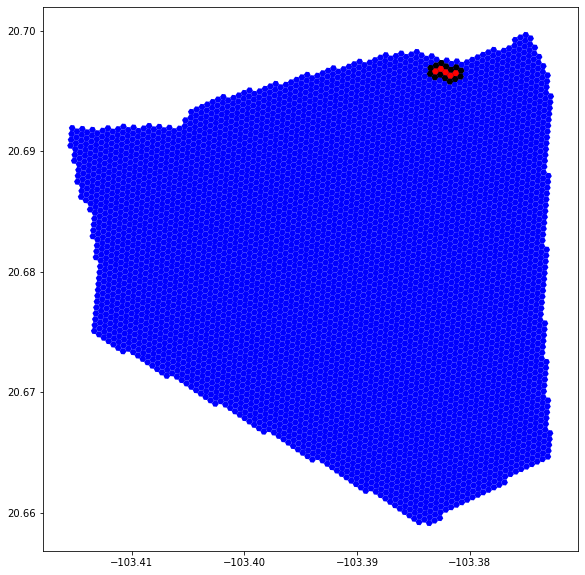

In [63]:
fig,ax = plt.subplots(figsize=(10,10))
ndvi.loc[ndvi.hex_id.isin(hex_intersect_list)].plot(zorder=3, ax=ax, color='red')
hex_study_area.plot(ax=ax, zorder=2, color='black')
ndvi.plot(ax=ax, color='blue')

### Create manzanas gdf

In [64]:
mnz = censo[['CVEGEO','geometry']].copy()

## Assign DENUE to manzanas

In [73]:
mnz_denue_df = gpd.sjoin_nearest(denue, mnz).groupby('CVEGEO').sum(numeric_only=True)[['per_ocu_num']].reset_index()
print(mnz_denue_df.shape)
mnz_denue_df.head(4)

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/array.py:344: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


(757, 2)


,CVEGEO,per_ocu_num
0,1403900010280018,200
1,1403900010295021,44
2,1403900010562001,3
3,1403900010562003,40


<AxesSubplot:>

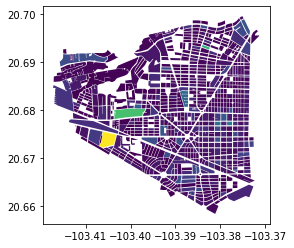

In [76]:
mnz_denue = censo[['CVEGEO','geometry']].merge(mnz_denue_df, on='CVEGEO')
mnz_denue.plot('per_ocu_num')

### Working force - population relation

In [84]:
mnz_pop_work = censo[['POBTOT','CVEGEO','geometry']].merge(mnz_denue[['CVEGEO','per_ocu_num']], on = 'CVEGEO', how='left')

In [92]:
mnz_pop_work.loc[mnz_pop_work.per_ocu_num.isna(),'per_ocu_num'] = 1
mnz_pop_work.loc[mnz_pop_work.POBTOT==0,'POBTOT'] = 1

In [93]:
mnz_pop_work['rel_pop_work'] = mnz_pop_work['POBTOT'] / mnz_pop_work['per_ocu_num']

In [94]:
mnz_pop_work['log_pop_work'] = np.log(mnz_pop_work['rel_pop_work'])

<AxesSubplot:>

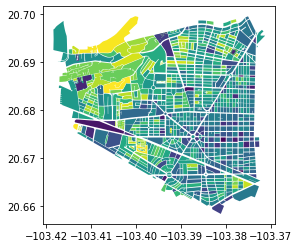

In [95]:
mnz_pop_work.plot('log_pop_work')

### Urban structure

In [99]:
urban_study_area = entorno.clip(hex_study_area)
urban_study_area.head(4)

,CVEGEO2,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,CVEVIAL_x,CVESEG,CVEFT_x,NOMVIAL_x,...,ESTACIONBICI,ARBOLES,ALUMPUB,TELPUB,PUESTOSEMI,PUESTOAMBU,BANQUETA,GUARNICION,TAMLOC,VIANOESP
1409,1403900010596005,14,039,0001,0596,005,03327,00007,1,Buenos Aires,...,3,1,1,1,3,3,1,1,11,0
1433,1403900010596012,14,039,0001,0596,012,03327,00007,3,Buenos Aires,...,3,1,1,3,3,3,1,1,11,0
1483,1403900010596022,14,039,0001,0596,022,07368,00001,4,Curazao,...,3,1,3,3,3,3,1,1,11,0
1485,1403900010596023,14,039,0001,0596,023,07368,00001,2,Curazao,...,3,1,1,3,3,3,1,1,11,0


In [127]:
urban_idx = {}
urban_elements = ['BANQUETA','ALUMPUB','RAMPAS','ARBOLES']

for ue in urban_elements:
    with_length = urban_study_area.to_crs("EPSG:6372").loc[urban_study_area[ue]==1].length.sum()
    without_length = urban_study_area.to_crs("EPSG:6372").loc[urban_study_area[ue]==3].length.sum()
    urban_idx[ue] = round(with_length / (with_length + without_length),3)

In [128]:
urban_idx

{'BANQUETA': 1.0, 'ALUMPUB': 0.561, 'RAMPAS': 0.94, 'ARBOLES': 1.0}

### Population density

In [129]:
censo_study_area = censo.clip(hex_study_area)

In [133]:
pobtot = censo_study_area.POBTOT.sum()
area = hex_study_area.to_crs("EPSG:6372").area.sum()/10000

In [134]:
pobtot / area

149.68651912969466